In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [16]:
avocado_info = pd.read_csv('avocado.csv')

In [58]:
organic = avocado_info.loc[avocado_info['type'] == 'organic', 'AveragePrice']

In [59]:
not_organic = avocado_info.loc[avocado_info['type'] == 'conventional', 'AveragePrice']

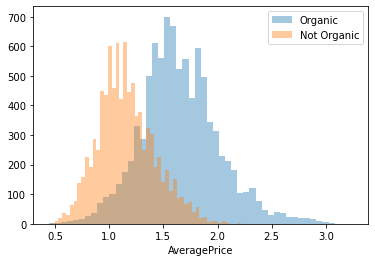

In [23]:
sn.distplot(organic['AveragePrice'], kde = False, label = 'Organic')
sn.distplot(not_organic['AveragePrice'], kde = False, label = 'Not Organic')
plt.legend()
plt.show()

In [24]:
observed_test_stat = np.mean(organic['AveragePrice']) - np.mean(not_organic['AveragePrice'])

In [25]:
observed_test_stat

0.4959590177573876

In [28]:
avocado_info['AveragePrice'].sample(frac = 1).reset_index(drop = True)

0        1.79
1        1.13
2        1.77
3        1.94
4        2.11
         ... 
18244    2.35
18245    1.19
18246    1.54
18247    1.28
18248    1.22
Name: AveragePrice, Length: 18249, dtype: float64

In [29]:
def perm(data):
    return data.sample(frac = 1).reset_index(drop = True)

In [48]:
sim_test_stat = np.array([])

reps = 900

for i in range (reps):
    perm_info = perm(avocado_info['AveragePrice'])
    
    df = pd.DataFrame({'Permutation Price':perm_info, 'type':avocado_info['type']})
    
    Organic = df.loc[df['type'] == 'organic', 'Permutation Price']
    Not_Organic = df.loc[df['type'] == 'conventional', 'Permutation Price']
    
    stat = np.mean(Not_Organic) - np.mean(Organic)
    
    sim_test_stat = np.append(sim_test_stat, stat)

In [49]:
sim_test_stat

array([ 5.28270766e-03,  4.01359699e-03,  1.40304292e-03, -3.05528368e-03,
        3.15860031e-04, -8.06158554e-03,  6.11124624e-03, -2.18509899e-03,
        4.22401949e-03,  8.72602881e-04, -5.50582899e-03, -8.67750971e-03,
       -2.76376085e-03,  1.15646959e-02,  5.77588538e-03, -5.21211425e-03,
       -4.70140132e-03,  3.25300735e-03, -8.61394458e-03,  4.20210048e-03,
        6.31493772e-04,  4.48485570e-03,  1.03699545e-03, -4.53920065e-03,
       -7.88623346e-03,  1.18299159e-02, -1.27873241e-02,  6.01480259e-03,
       -2.51842325e-04,  9.40128961e-03,  3.03820105e-03,  1.13016678e-02,
        6.24933600e-03,  1.60688971e-03,  7.73967336e-04,  1.20780843e-04,
        7.63461742e-03, -1.39862939e-02, -5.59788883e-03,  8.55067673e-04,
       -2.27496693e-03, -3.35557412e-03, -4.20383980e-03,  3.58836820e-03,
        2.18555157e-03,  6.07398392e-03, -1.11653173e-02, -1.24936093e-02,
        5.35050129e-04,  9.45827904e-03,  1.08062981e-02,  3.02285775e-03,
       -6.29710524e-03,  

In [46]:
p_value = np.count_nonzero(sim_test_stat <= observed_test_stat/reps)

In [51]:
p_value

445

In [ ]:
### BOOTSTRAP PRACTICE TIME ###

In [60]:
np.random.choice(organic, size = len(organic))

np.random.choice(not_organic, size = len(not_organic))

array([0.98, 1.59, 0.99, ..., 1.24, 1.08, 1.17])

In [61]:
def resample (og_sample):
    return np.random.choice(og_sample, size = len(og_sample))

In [62]:
def bootstrap (og_sample, rep):
    
    means = np.array([])
    
    for i in range (reps):
        new_sample = resample(og_sample)
        new_means = np.mean(new_sample)
        means = np.append(means, new_means)
    return means

In [63]:
organic_means = bootstrap(organic, 500)
not_organic_means = bootstrap(not_organic, 500)

In [66]:
estimate = organic_means - not_organic_means

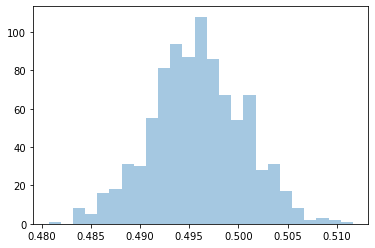

In [68]:
sn.distplot(estimate, kde = False)
plt.show()

In [69]:
(np.percentile(estimate, 2.5), np.percentile(estimate, 97.5))

(0.4862879992502205, 0.5047535137617725)